In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('E-com_Data.csv')
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [4]:
#Checking null values

In [5]:
df.isnull().sum()

CustomerID           136927
Item Code              3137
InvoieNo               3137
Date of purchase       3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64

In [7]:
df = df.dropna(subset = ['CustomerID'])

In [8]:
df.isnull().sum()

CustomerID                0
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     396006
Reason of return     404189
Sold as set          404189
dtype: int64

In [9]:
df.duplicated().sum()

8

In [10]:
df.shape

(404189, 12)

In [11]:
#df.drop(df[df.duplicated()],axis = 1)
df = df[~(df.duplicated())]
df.shape

(404181, 12)

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537949
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404181 non-null  float64
 1   Item Code          404181 non-null  object 
 2   InvoieNo           404181 non-null  float64
 3   Date of purchase   404181 non-null  object 
 4   Quantity           404181 non-null  float64
 5   Time               404181 non-null  object 
 6   price per Unit     404181 non-null  float64
 7   Price              404181 non-null  float64
 8   Shipping Location  404181 non-null  object 
 9   Cancelled_status   8183 non-null    object 
 10  Reason of return   0 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 40.1+ MB


In [14]:
#Removing unnecassary columns
# 'Item Code', 'Quantity','Time', 'price per Unit', 'Shipping Location','Cancelled_status', 'Reason of return', 'Sold as set'

In [15]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [16]:
df1 = df.drop(['Item Code', 'Quantity','Time', 'price per Unit', 'Shipping Location','Cancelled_status', 'Reason of return', 'Sold as set'],axis = 1)

In [17]:
df1

,CustomerID,InvoieNo,Date of purchase,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0
...,...,...,...,...
537945,37.0,402292.0,28-11-2017,384.0
537946,37.0,402292.0,27-11-2017,398.0
537947,21.0,363890.0,21-12-2016,2464.0
537948,21.0,363890.0,21-12-2016,4068.0


In [18]:
df1.shape

(404181, 4)

In [19]:
df1.isnull().sum()

CustomerID          0
InvoieNo            0
Date of purchase    0
Price               0
dtype: int64

In [20]:
df1['Date of purchase']= pd.to_datetime(df1['Date of purchase'])

In [21]:
df1['Date of purchase'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date of purchase, dtype: object

In [22]:
#Finding recency
#Recency = latest date - Date
#Frequency = count(Invoice No)groupby Customerid
#Monetary = price groupby customerid

In [23]:
import datetime as dt
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

In [24]:
df1['Recency'] = df1['Date of purchase'].apply(lambda x : (latest_date - x).days)
df1

,CustomerID,InvoieNo,Date of purchase,Price,Recency
0,4355.0,398177.0,2017-10-29,1926.0,52
1,4352.0,394422.0,2017-05-10,1740.0,224
2,4352.0,394422.0,2017-12-10,1866.0,10
3,4352.0,388633.0,2017-08-22,1869.0,120
4,4352.0,394422.0,2017-10-10,1888.0,71
...,...,...,...,...,...
537945,37.0,402292.0,2017-11-28,384.0,22
537946,37.0,402292.0,2017-11-27,398.0,23
537947,21.0,363890.0,2016-12-21,2464.0,364
537948,21.0,363890.0,2016-12-21,4068.0,364


In [25]:
df1.groupby('CustomerID')['Recency'].max().shape

(4349,)

In [26]:
df1.groupby('CustomerID')['Price'].sum().shape

(4349,)

In [27]:
vf = pd.DataFrame([df1.groupby('CustomerID')['Recency'].max(),df1.groupby('CustomerID')['Price'].sum()])

In [28]:
vf

CustomerID,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,...,4363.0,4364.0,4365.0,4366.0,4367.0,4368.0,4369.0,4370.0,4371.0,4372.0
Recency,495.0,366.0,342.0,293.0,344.0,213.0,349.0,221.0,335.0,162.0,...,319.0,342.0,343.0,321.0,313.0,282.0,187.0,252.0,352.0,348.0
Price,553704.0,257404.0,176613.0,41976.0,151822.0,9410.0,135550.0,65832.0,331601.0,771439.0,...,26980.0,292.0,43069.0,12837.0,20462.0,20480.0,10774.0,24962.0,280608.0,262820.0


In [29]:
vf = vf.transpose().reset_index()

In [30]:
a = df1.groupby('CustomerID')['InvoieNo'].count()
b = pd.DataFrame(a)


In [31]:
vf['Frequency'] = b['InvoieNo']
vf

,CustomerID,Recency,Price,Frequency
0,2.0,495.0,553704.0,NaN
1,3.0,366.0,257404.0,NaN
2,4.0,342.0,176613.0,182.0
3,5.0,293.0,41976.0,27.0
4,6.0,344.0,151822.0,72.0
...,...,...,...,...
4344,4368.0,282.0,20480.0,4.0
4345,4369.0,187.0,10774.0,49.0
4346,4370.0,252.0,24962.0,8.0
4347,4371.0,352.0,280608.0,22.0


In [32]:
vf[vf['Recency']<100]

,CustomerID,Recency,Price,Frequency
20,22.0,68.0,182448.0,10.0
23,25.0,35.0,76012.0,49.0
35,37.0,31.0,60518.0,100.0
44,46.0,58.0,42252.0,4.0
79,81.0,32.0,9948.0,11.0
...,...,...,...,...
4272,4296.0,25.0,6360.0,21.0
4288,4312.0,36.0,16132.0,1.0
4293,4317.0,98.0,35362.0,119.0
4324,4348.0,97.0,693336.0,19.0


In [33]:
df1

,CustomerID,InvoieNo,Date of purchase,Price,Recency
0,4355.0,398177.0,2017-10-29,1926.0,52
1,4352.0,394422.0,2017-05-10,1740.0,224
2,4352.0,394422.0,2017-12-10,1866.0,10
3,4352.0,388633.0,2017-08-22,1869.0,120
4,4352.0,394422.0,2017-10-10,1888.0,71
...,...,...,...,...,...
537945,37.0,402292.0,2017-11-28,384.0,22
537946,37.0,402292.0,2017-11-27,398.0,23
537947,21.0,363890.0,2016-12-21,2464.0,364
537948,21.0,363890.0,2016-12-21,4068.0,364


In [34]:
rfmscore = df1.groupby('CustomerID').agg({'Date of purchase': lambda x:(latest_date - x.max()).days, 'Price' :lambda x: x.sum(),'InvoieNo' : lambda x :x.count()})

In [35]:
rfmscore

,Date of purchase,Price,InvoieNo
CustomerID,,,
2.0,4,553704.0,182
3.0,77,257404.0,27
4.0,20,176613.0,72
5.0,18,41976.0,16
6.0,9,151822.0,84
...,...,...,...
4368.0,17,20480.0,10
4369.0,181,10774.0,7
4370.0,12,24962.0,13


In [36]:
rfmscore = rfmscore.rename(columns = {'Date of purchase': 'Recency','Price':'Monetary','InvoieNo':'Frequency'}).reset_index()

In [37]:
rfmscore

,CustomerID,Recency,Monetary,Frequency
0,2.0,4,553704.0,182
1,3.0,77,257404.0,27
2,4.0,20,176613.0,72
3,5.0,18,41976.0,16
4,6.0,9,151822.0,84
...,...,...,...,...
4344,4368.0,17,20480.0,10
4345,4369.0,181,10774.0,7
4346,4370.0,12,24962.0,13
4347,4371.0,4,280608.0,754


In [38]:
rfmscore.describe()

,CustomerID,Recency,Monetary,Frequency
count,4349.000000,4349.000000,4.349000e+03,4349.000000
mean,2187.093355,61.445160,2.299380e+05,92.936537
std,1261.544319,89.656941,8.572589e+05,232.086935
min,2.000000,1.000000,-5.037200e+04,1.000000
25%,1095.000000,10.000000,3.814800e+04,17.000000
50%,2186.000000,19.000000,8.365500e+04,42.000000
75%,3279.000000,73.000000,2.056120e+05,101.000000
max,4372.000000,617.000000,3.553619e+07,7970.000000


In [39]:
quantile = rfmscore.quantile(q = [0.25,0.50,0.75])
quantile = quantile.to_dict()

In [40]:
quantile

{'CustomerID': {0.25: 1095.0, 0.5: 2186.0, 0.75: 3279.0},
 'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0}}

In [41]:
def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FnMscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [42]:
rfmscore1 = rfmscore.copy()
rfmscore1['R'] = rfmscore1['Recency'].apply(RScore, args = ('Recency',quantile))
rfmscore1['F'] = rfmscore1['Frequency'].apply(FnMscore,args = ('Frequency',quantile))
rfmscore1['M'] = rfmscore1['Monetary'].apply(FnMscore,args = ('Monetary',quantile))

In [43]:
rfmscore1

,CustomerID,Recency,Monetary,Frequency,R,F,M
0,2.0,4,553704.0,182,1,1,1
1,3.0,77,257404.0,27,4,3,1
2,4.0,20,176613.0,72,3,2,2
3,5.0,18,41976.0,16,2,4,3
4,6.0,9,151822.0,84,1,2,2
...,...,...,...,...,...,...,...
4344,4368.0,17,20480.0,10,2,4,4
4345,4369.0,181,10774.0,7,4,4,4
4346,4370.0,12,24962.0,13,2,4,4
4347,4371.0,4,280608.0,754,1,1,1


In [44]:
rfmscore1['score'] = rfmscore1['R'] + rfmscore1['F'] + rfmscore1['M']
rfmscore1

,CustomerID,Recency,Monetary,Frequency,R,F,M,score
0,2.0,4,553704.0,182,1,1,1,3
1,3.0,77,257404.0,27,4,3,1,8
2,4.0,20,176613.0,72,3,2,2,7
3,5.0,18,41976.0,16,2,4,3,9
4,6.0,9,151822.0,84,1,2,2,5
...,...,...,...,...,...,...,...,...
4344,4368.0,17,20480.0,10,2,4,4,10
4345,4369.0,181,10774.0,7,4,4,4,12
4346,4370.0,12,24962.0,13,2,4,4,10
4347,4371.0,4,280608.0,754,1,1,1,3


In [45]:
rfmscore1['score1'] = rfmscore1['R'].map(str) + rfmscore1['F'].map(str) + rfmscore1['M'].map(str)

In [46]:
rfmscore1

,CustomerID,Recency,Monetary,Frequency,R,F,M,score,score1
0,2.0,4,553704.0,182,1,1,1,3,111
1,3.0,77,257404.0,27,4,3,1,8,431
2,4.0,20,176613.0,72,3,2,2,7,322
3,5.0,18,41976.0,16,2,4,3,9,243
4,6.0,9,151822.0,84,1,2,2,5,122
...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,20480.0,10,2,4,4,10,244
4345,4369.0,181,10774.0,7,4,4,4,12,444
4346,4370.0,12,24962.0,13,2,4,4,10,244
4347,4371.0,4,280608.0,754,1,1,1,3,111


In [47]:
rfmscore1.to_csv('Manual.csv')

In [ ]:
customers = ['Diamond','Gold','Silver','Bronse']

In [53]:
scorecut = pd.qcut(rfmscore1.score,q = 4,labels = customers)


pandas.core.series.Series

In [57]:
scorecut

0       Diamond
1          Gold
2          Gold
3        Silver
4       Diamond
         ...   
4344     Silver
4345     Bronse
4346     Silver
4347    Diamond
4348       Gold
Name: score, Length: 4349, dtype: category
Categories (4, object): ['Diamond' < 'Gold' < 'Silver' < 'Bronse']

In [54]:
rfmscore1['customers'] = scorecut.values

In [55]:
rfmscore1

,CustomerID,Recency,Monetary,Frequency,R,F,M,score,score1,customers
0,2.0,4,553704.0,182,1,1,1,3,111,Diamond
1,3.0,77,257404.0,27,4,3,1,8,431,Gold
2,4.0,20,176613.0,72,3,2,2,7,322,Gold
3,5.0,18,41976.0,16,2,4,3,9,243,Silver
4,6.0,9,151822.0,84,1,2,2,5,122,Diamond
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,20480.0,10,2,4,4,10,244,Silver
4345,4369.0,181,10774.0,7,4,4,4,12,444,Bronse
4346,4370.0,12,24962.0,13,2,4,4,10,244,Silver
4347,4371.0,4,280608.0,754,1,1,1,3,111,Diamond


In [58]:
#Building models

In [59]:
#making copy
rfm1 = rfmscore1.copy()
rfm1

,CustomerID,Recency,Monetary,Frequency,R,F,M,score,score1,customers
0,2.0,4,553704.0,182,1,1,1,3,111,Diamond
1,3.0,77,257404.0,27,4,3,1,8,431,Gold
2,4.0,20,176613.0,72,3,2,2,7,322,Gold
3,5.0,18,41976.0,16,2,4,3,9,243,Silver
4,6.0,9,151822.0,84,1,2,2,5,122,Diamond
...,...,...,...,...,...,...,...,...,...,...
4344,4368.0,17,20480.0,10,2,4,4,10,244,Silver
4345,4369.0,181,10774.0,7,4,4,4,12,444,Bronse
4346,4370.0,12,24962.0,13,2,4,4,10,244,Silver
4347,4371.0,4,280608.0,754,1,1,1,3,111,Diamond


In [60]:
rfm1 = rfm1.iloc[:,1:4]
rfm1

,Recency,Monetary,Frequency
0,4,553704.0,182
1,77,257404.0,27
2,20,176613.0,72
3,18,41976.0,16
4,9,151822.0,84
...,...,...,...
4344,17,20480.0,10
4345,181,10774.0,7
4346,12,24962.0,13
4347,4,280608.0,754


In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
st = StandardScaler()
rfm_scaled = st.fit_transform(rfm1)
rfm_scaled = pd.DataFrame(data = rfm_scaled,columns = rfm1.columns)
rfm_scaled

,Recency,Monetary,Frequency
0,-0.640796,0.377719,0.383795
1,0.173513,0.032043,-0.284135
2,-0.462317,-0.062211,-0.090220
3,-0.484627,-0.219285,-0.331537
4,-0.585021,-0.091133,-0.038510
...,...,...,...
4344,-0.495782,-0.244363,-0.357392
4345,1.333623,-0.255686,-0.370320
4346,-0.551556,-0.239134,-0.344465
4347,-0.640796,0.059114,2.848672


In [66]:
from sklearn.cluster import KMeans

In [67]:
lis = []
for i in range(1,18):
    kmean = KMeans(n_clusters=i,random_state=101)
    kmean.fit(rfm_scaled)
    lis.append(kmean.inertia_)

In [70]:
lis

[13047.000000000005,
 9013.070458558639,
 5554.762804279887,
 4352.874044718689,
 3389.0355253753505,
 2480.4220700705882,
 1975.0286299101126,
 1704.4738635516562,
 1509.5276307558988,
 1343.912218696979,
 1127.841503804719,
 994.9402546320956,
 865.2725252410025,
 767.1246943417029,
 683.7038894345573,
 606.9909679637617,
 548.0793967647696]

In [71]:
g

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

<AxesSubplot: >

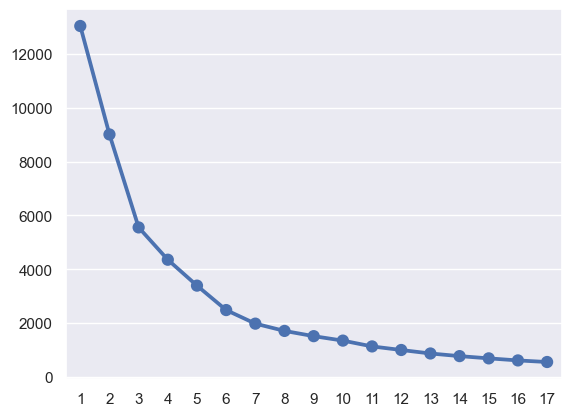

In [74]:
g = list(range(1,18))
sns.pointplot(g,lis)

In [84]:
kmean = KMeans(n_clusters=6,random_state=101)
kmean.fit(rfm1)
rfm1['customer_classification'] = kmean.labels_
rfm1

,Recency,Monetary,Frequency,customer_classification
0,4,553704.0,182,5
1,77,257404.0,27,0
2,20,176613.0,72,0
3,18,41976.0,16,0
4,9,151822.0,84,0
...,...,...,...,...
4344,17,20480.0,10,0
4345,181,10774.0,7,0
4346,12,24962.0,13,0
4347,4,280608.0,754,0


In [85]:
rfm1

,Recency,Monetary,Frequency,customer_classification
0,4,553704.0,182,5
1,77,257404.0,27,0
2,20,176613.0,72,0
3,18,41976.0,16,0
4,9,151822.0,84,0
...,...,...,...,...
4344,17,20480.0,10,0
4345,181,10774.0,7,0
4346,12,24962.0,13,0
4347,4,280608.0,754,0


In [79]:
#DATA

In [90]:
rfm1['CustomerID'] = rfmscore1['CustomerID']
final_report = rfm1.groupby('customer_classification')[['Recency','Frequency','Monetary','CustomerID']].agg({'Recency':'mean','Frequency':'mean','Monetary':'mean','CustomerID':'nunique'})

In [98]:
final_report.rename(columns = {'No. of customers':'Numcustomer'},inplace = True)


In [99]:
final_report['%NumBuyers'] = round(final_report['Numcustomer'].apply(lambda x : x/sum(final_report['Numcustomer'])*100),2)
final_report

,Recency,Frequency,Monetary,Numcustomer,%NumBuyers
customer_classification,,,,,
0,70.363735,52.478083,9.164340e+04,3673,84.46
1,5.400000,1881.600000,1.354464e+07,5,0.11
2,3.000000,2053.000000,3.553619e+07,1,0.02
3,8.743902,384.158537,1.798996e+06,82,1.89
4,5.750000,1694.375000,6.296496e+06,16,0.37
5,13.881119,247.127622,5.452327e+05,572,13.15


In [100]:
final_report.to_csv('Final_report.csv')